enter the number of variables: 20
Enter the initial population size: 10
Enter the minimum value of X: -500
Enter the maximum value of X: 500
Enter the max number of iterations: 300
[ -732.24038674  -732.24038674  -732.24038674  -864.71141812
  -873.47504674  -873.47504674  -873.47504674  -873.50045103
  -876.09888256  -876.99186322  -876.99186322  -877.19389123
  -879.59108056  -879.85718187  -880.15855878  -880.1930213
  -880.24770263  -882.17420044  -882.48372788  -882.48372788
  -883.53311838  -886.96602004  -888.28421197  -888.28421197
  -888.28566257  -888.28566257  -888.29559867  -889.64052293
  -892.86231143  -892.93482238  -892.93482238  -892.96016022
  -893.80592325  -894.92600332  -894.93912695  -895.23263796
  -897.80503697  -897.80503697  -899.56750405  -899.63245518
  -900.93543229  -901.42013064  -901.42013064  -901.47477418
  -902.4718767   -903.44631936  -904.38855073  -904.81570707
  -905.30121487  -906.24276444  -906.4607439   -909.17398994
  -909.10812875  -909.07627

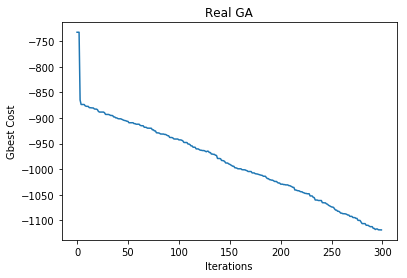

In [3]:
#Generating Initial Population
import numpy as np
import matplotlib.pyplot as plt
v=int(input("enter the number of variables: "))
N=int(input("Enter the initial population size: "))
xmin=float(input("Enter the minimum value of X: "))
xmax=float(input("Enter the maximum value of X: "))
iterations=int(input("Enter the max number of iterations: "))
def POP(v,N,xmin,xmax):
    return ((np.random.rand(N,v))*(2*xmax))-xmax
pop=POP(v,N,xmin,xmax)
#fitness
def fitness(a):
    l=0
    for value in a:
        o=(-value)*np.sin(np.sqrt(abs(value)))
        l+=o
    return l
def findfitness(pop):
    return np.apply_along_axis(fitness,1,pop)
bests=np.empty((iterations,v))
for iteration in range(0,iterations):
        fit=findfitness(pop)
        #Tournament Selection
        parent=np.empty((N,v))
        for s in range(0,N):
            r1=np.random.randint(0,N)
            r2=r1
            while r2==r1:
                r2=np.random.randint(0,N)
            if fit[r1]<fit[r2]:
                parent[s]=pop[r1]
            else:
                parent[s]=pop[r2]
        #crossover
        Pc=0.8
        Uc=20
        child=np.empty((int((Pc*N)),v))
        for c in range(0,int(Pc*N),2):
            for f in range(0,v):
                r=np.random.rand()
                if r<=0.5:
                    b=(2*r)**(1/(1+Uc))
                else:
                    b=1/((2*(1-r))**(1/(1+Uc)))
                child[c,f]= ((1+b)*parent[c,f]+(1-b)*parent[c+1,f])/2
                child[c+1,f] =((1-b)*parent[c,f]+(1+b)*parent[c+1,f])/2
        #Mutation
        mpop=np.concatenate((pop, child), axis=0)
        Pm=0.2
        Um=20
        for i in range(0,int(Pm*mpop.shape[0])):
            r3=np.random.randint(0,mpop.shape[0])
            for m in range(0,v):
                r4=np.random.rand()
                if r4<=0.5:
                    d=((2*r4)**(1/(1+Um)))-1
                else:
                    d=1-((2*(1-r4))**(1/(1+Um)))
                mpop[r3,m]+=d
        fitness_b=findfitness(mpop)
        sortindex=np.argsort(fitness_b,axis=0)
        mpop=mpop[sortindex,:].reshape(int(N+(Pc*N)),v)
        newgen=mpop[0:N,:]
        fitness_a=findfitness(newgen)
        bests[iteration]=newgen[0]        
        pop=newgen
bestcost=findfitness(bests)
print(bestcost)
plt.plot(bestcost)
plt.xlabel('Iterations')
plt.ylabel('Gbest Cost')
plt.title('Real GA')
plt.show()